# MA934 - Week 8 (assessed!) Problem Sheet

## Deadline: 17:00 (UK time) on Friday 1 December 

For this assignment, you must create a new Jupyter notebook called MA934_Week8_UniID.ipynb to contain the implementations that you write. This should also be exported as a .pdf file such that all execution output (from data to plots) is visible as produced on your own machine. You can separate out individual tasks if you prefer, but the full submission should be made as a single .zip via [our website](https://warwick.ac.uk/fac/sci/mathsys/courses/msc/ma934/resources/assessedwork/ma934declaration). The platform will not allow you to upload more than one file.

A few tips:
- please make sure to debug intermediate outputs as you code along. You are welcome to design smaller test cases and toy problems to verify your work (even if they are not part of the final submission).
- consider possible forms of input or arguments and make sure your solution can cope with *interesting* cases.
- do not forget to comment your code and use Markdown cells to explain what you are doing. A perfectly functional solution with no information about the thought process will not receive more than a subset of the points (~$70\%$ depending on the difficulty of the problem and how transparent the algorithm flow is). 
- generally getting used to writing tidy solutions is good practice. Feel free to use [online resources](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet) for editing guidance.

The problems below give you a chance to practice some of the concepts we learned about in week 7, with a focus on the finite difference method and numerical integration.

## Task 0 - getting up to speed [warm-up, 0 marks]

In case you have not done so already, please consult the Jupyter notebook on finite difference approximations from Week 7. You can find it [here](https://warwick.ac.uk/fac/sci/mathsys/courses/msc/ma934/resources/ma934_2324_week2_2_finitedifferences.ipynb). Both standard tests and convergence studies will be useful in what follows.

## Task 1 - the finite difference method in the real world [50 marks]

A problem to rekindle our love for physics. Our inital motivation for studying derivative approximation is (partly) grounded in solving real-world problems (in true MathSys spirit). Such an example is provided by solving a variation of the **beam deflection problem**, sketched below (see Chapra, Steven C., and Raymond P. Canale. Numerical methods for Engineers. Vol. 1221. New York: McGraw-Hill, 2011 for details):

<img src="MA934_Week8_Beam.png" alt="array" style="width: 600px;"/>  


We need to define the following parameters (with some sensible starting values in brackets):
 * $E$ is the modulus of elasticity ($150$ GPa),
 * $I$ is the moment of inertia ($20000$ cm$^4$),
 * $w$ is the applied load ($10$ kN/m),
 * $L$ is the length of the beam ($10$ m).
 
With the above in mind, we want to solve the differential equation
$$EI \dfrac{d^2 y}{dx^2} = \dfrac{wLx}{2} - \dfrac{wx^2}{2}.$$
 
Note: you may notice the units above being quite different. Converting everything to a common reference system (e.g. SI units) is highly encouraged (and part of the problem!).

Here is a suggested solution strategy:
1. Before starting to implement a numerical solution, can you find an analytical solution to the problem to serve as reference result?
2. What finite difference approximation method would you use and why? Write down the chosen technique and implement it once you have given it some thought.
3. Analyse the obtained behaviour and consider varying $h$ (or $\Delta x$) from just a handful of points to a refined solution until you are satisfied with the quality of your solution. Expand on how you have reached this conclusion.

0) Let's check that the units of measure on both sides of ODE are the same (if not, it will indicate that our ODE has some mistake)

$\bullet$ $\dfrac{wLx}{2}$ is measured in $ \frac{N}{m} \cdot m \cdot m= Nm = \frac{kg \cdot m^2}{c^2}$

$\bullet$ $\dfrac{wx^2}{2}$ is measured in $ \frac{N}{m} \cdot m \cdot m= Nm = \frac{kg \cdot m^2}{c^2}$

$\bullet$ $EI \dfrac{d^2 y}{dx^2}$ is measured in $ Pa \cdot m^4 \cdot \dfrac{m}{m^2} = \frac{N}{m^2}\cdot m^4 \cdot \dfrac{m}{m^2}  = N m = \frac{kg \cdot m^2}{c^2}$

So we see that the units of measure in both sides of the equation are the same - this is good

And our ODE takes the form $y^{''}=cx+dx^2$, where 

$c=\dfrac{\omega L}{2EI}=\dfrac{10^4 \dfrac{N}{m}\cdot 10 m}{2 \cdot 15 \cdot 10^{10}\dfrac{N}{m^2} \cdot 2 \cdot 10^{-4} m^4}\dfrac{1}{m^2}=\dfrac{1}{600}\dfrac{1}{m^2}$

$d=-\dfrac{\omega L}{2EI}=\dfrac{1}{6000}\dfrac{1}{m^3}$

1) First we will find analytical solution, to do this we just need to integrate both sides two times

$EI \dfrac{d^2 y}{dx^2} = \dfrac{wLx}{2} - \dfrac{wx^2}{2}$

$=>\dfrac{d^2 y}{dx^2} = \dfrac{wLx}{2EI} - \dfrac{wx^2}{2EI}$

$=>\dfrac{dy}{dx} = \dfrac{wLx^2}{4EI} - \dfrac{wx^3}{6EI} +C_1$

$=> y = \dfrac{wLx^3}{12EI} - \dfrac{wx^4}{24EI} +C_1x +C_2$

And now we need two boundary conditions to find two constants $C_1$ and $C_2$. We will take boundary conditions from physical understanding of the problem we are dealing with: we understand, that $y(0)=y(L)=0$, that is, both ends of the beam does not move along $y$ axis.

Having obtained these boundary conditions, we now can find the constants:

$y(0)=0 => C_2=0$

$y(L)=0 => \dfrac{wL^4}{12EI} - \dfrac{wL^4}{24EI} + C_1L=0 => C_1=-\dfrac{wL^3}{24EI}$

$=> y = \dfrac{wLx^3}{12EI} - \dfrac{wx^4}{24EI} - \dfrac{wL^3x}{24EI} $

2) I will use the standard scheme of second order to approximate second derivative - because scheme of secon order is better than scheme of first order.
    
$ y^{''}(x_k) = \dfrac{y_{k-1}-2y_k +y_{k+1}}{h^2} +\underline {O}(h^2)$, 

where $n$ is the number of points on the interval $[0,L]$, $h=\dfrac{L}{n}$, $x_k=kh$, $y_k=y(x_k)$.

Indeed, let's use Taylor's expansion theorem:

$\dfrac{y_{k-1}-2y_k +y_{k+1}}{h^2} =\dfrac{y(x_k-h) -2y(x_k) +y(x_k+h)}{h^2} =$

$=\dfrac{
y(x_k)-y^{'}(x_k)h +\dfrac{1}{2}y^{''}(x_k)h^2 -\dfrac{1}{6}y^{''}(x_k)h^3  +\underline {O}(h^4) 
-2y_k +
y(x_k)+y^{'}(x_k)h +\dfrac{1}{2}y^{''}(x_k)h^2 +\dfrac{1}{6}y^{''}(x_k)h^3  +\underline {O}(h^4)
}{h^2} =$

$=y^{''}(x_k) + \underline {O}(h^2)$

So for $1<=k<=n-1$ we will have $\dfrac{y_{k-1}-2y_k +y_{k+1}}{h^2}=f_k:=f(x_k)$, where $f(x)= Ax+Bx^2$ with A and B defined and calculated earlier; and for $k=0$ we have just $y_0=0$, and for $k=n$ we have $y_n=0$ from boundary conditions $y(0)=y(L)=0$.

And now if we rewrite these equations as a matrix, we will have $AX=B$

$
\begin{pmatrix}
1 & 0 & 0 & \dots & 0 \\
\dfrac{1}{h^2} & \dfrac{-2}{h^2} & \dfrac{1}{h^2} & \dots & 0 \\
0 & \dfrac{1}{h^2} & \dfrac{-2}{h^2} & \dfrac{1}{h^2} & \dots & 0 \\
\dots  & \dots  & \dots  & \dots & \dots  \\
0 & 0 & 0 & \dots & 1
\end{pmatrix}
\begin{pmatrix}
y_0 \\ y_1 \\ \dots \\ y_n 
\end{pmatrix}
=
\begin{pmatrix}
0 \\ f_1 \\ f_2\\ \dots \\ 0
\end{pmatrix}
$

The maximum error is:  0.0013333333333333322
The L2 error norm is:  0.0003777051491550215


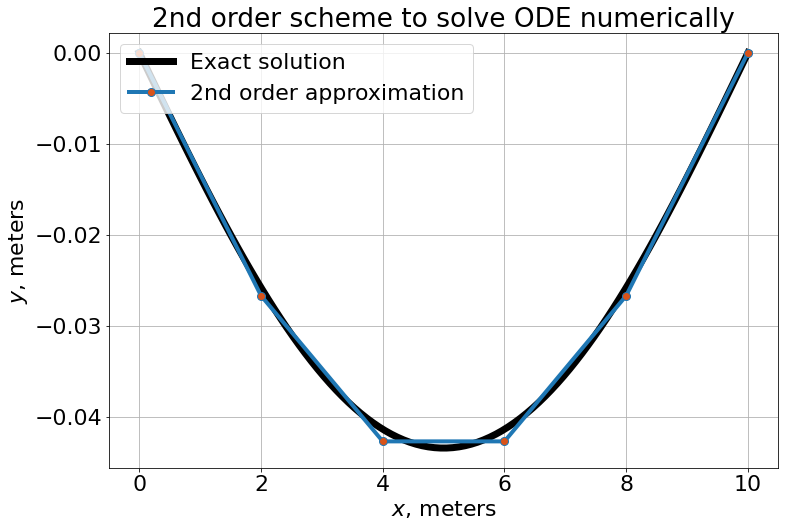

In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

E = 150*10**9 # Pa
I = 2/10**4 # m^4
w = 10**4 # N/m
L = 10 # m

def y_exact(x): #y_exact
    return (w*L*x**3)/(12*E*I)-(w*x**4)/(24*E*I) - (w*x*L**3)/(24*E*I) 
def f(x):
    return (w*L)/(2*E*I)*x -w/(2*E*I)*x**2


def fill_xyAf_2ndorder(n):
    h=L/(n)
    mas_x=[k*h for k in range(0,n+1)]
    mas_y_exact=[y_exact(x_k) for x_k in mas_x]
    mas_f=[f(x_k) for x_k in mas_x]
    mas_f[0]=0
    mas_f[n]=0
    A=np.zeros((n+1)*(n+1)).reshape(n+1,n+1)
    A[0][0]=1
    A[n][n]=1
    for k in range(1,n):
        A[k][k-1]=1/h**2
        A[k][k]=-2/h**2
        A[k][k+1]=1/h**2
    return mas_x, mas_y_exact, A, mas_f

#let's try some n and plot the result
n=5
mas_x, mas_y_exact, A, mas_f=fill_xyAf_2ndorder(n)
mas_y=np.linalg.solve(A,mas_f)

errorLinfty = LA.norm(mas_y-mas_y_exact, np.inf)
print ("The maximum error is: ", errorLinfty)

errorL2 = LA.norm(mas_y-mas_y_exact)/len(mas_y)
print ("The L2 error norm is: ", errorL2)

# Plot results and look at the qualitative agreement
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 8))

plt.plot(np.linspace(0,L,100), [y_exact(x) for x in np.linspace(0,L,100)], "k-",\
         lw=7,label = r"Exact solution")

plt.plot(mas_x, mas_y, "o-", lw=4,  markersize = 8, label = "2nd order approximation",markerfacecolor=(0.85, 0.325, 0.098, 1))


plt.legend(loc="upper left")

plt.xlabel(r"$x$, meters")
plt.ylabel(r"$y$, meters")

plt.grid()
plt.title('2nd order scheme to solve ODE numerically')
plt.show()



We see that the approximal solution is close to the exact solution - so our approximal ODE solver works not bad!

Now let's check that the that the order of the scheme is indeed second.
We assume that $err_{l2}=ch^p => \log(err_{l2}) =\log c + p \log(h)= \log c + p \log(L/n)=\log(cL^p) - p\log(n)$
So $\log(err_{l2})$ should depend on $\log(n)$ as a linear function with slope two; let's check it

 82%|████████▏ | 9/11 [00:00<00:00, 64.96it/s]

n= 4
n= 8
n= 16
n= 32
n= 64
n= 128
n= 256
n= 512
n= 1024
n= 2048
n= 4096


100%|██████████| 11/11 [00:02<00:00,  4.67it/s]


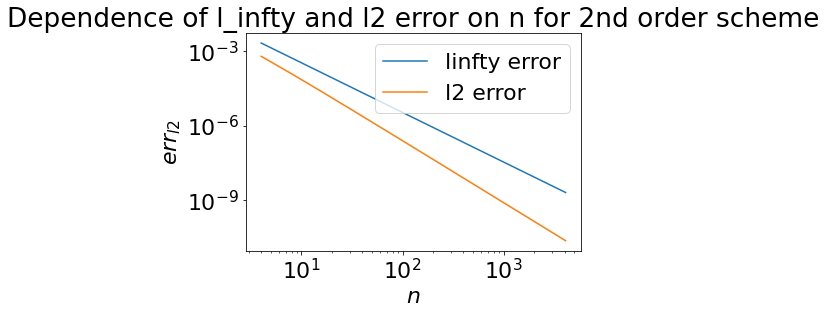

In [3]:
from tqdm import tqdm

mas_n=np.array([2**i for i in range(2,13)])
mas_errl2=[]
mas_err_linfty=[]
for n in tqdm(mas_n):
    print("n=",n)
    mas_x, mas_y_exact, A, mas_f=fill_xyAf_2ndorder(n)
    mas_y=np.linalg.solve(A,mas_f)
    errorLinfty = LA.norm(mas_y-mas_y_exact, np.inf)
    mas_err_linfty.append(errorLinfty)
    errorL2 = LA.norm(mas_y-mas_y_exact)/len(mas_y)
    mas_errl2.append(errorL2)

mas_err_linfty=np.array(mas_err_linfty)
mas_errl2=np.array(mas_errl2)
plt.loglog(mas_n, mas_err_linfty,label='linfty error')
plt.loglog(mas_n, mas_errl2,label='l2 error')
plt.xlabel(r'$n$')
plt.ylabel(r'$err_{l2}$')
plt.legend()
plt.title('Dependence of l_infty and l2 error on n for 2nd order scheme')
plt.legend(loc="upper right")
plt.show()

So from the graph we see, that if we want L infinity error of $10^{-9}$, we should take approximately $10^3$ points.

In [4]:
#for 2nd order method
(np.log(mas_err_linfty)[-1] - np.log(mas_err_linfty)[-3])/(np.log(mas_n)[-1]-np.log(mas_n)[-3])

-1.999991750372376

In [5]:
#for 2nd order method
(np.log(mas_errl2)[-1] - np.log(mas_errl2)[-3])/(np.log(mas_n)[-1]-np.log(mas_n)[-3])

-2.4994424303203773

So we see that the coefficient for L_infinity norm is 2, as we expected, but bur L2 norm the coefficient is is 2.5, 
which I didn't expect;

Now let's try scheme of 4nd order Numerov's scheme and see if the coefficient will be 4 or something else

Numerov scheme: we use Taylor expansion to power 6 and see that

$\dfrac{y_{k-1}-2y_k +y_{k+1}}{h^2}= y^{''}(x_k) + \dfrac{y^{(4)}(x_k)}{12}h^2 +\underline {O}(h^4)$


So to obtain scheme of 4nd order we should take 

$f_k=y^{''}(x_k) + \dfrac{y^{(4)}(x_k)}{12}h^2 = f(x_k)+ \dfrac{f^{(2)}(x_k)}{12}h^2 $

And $\dfrac{f^{(2)}(x_k)}{12}h^2$ we approximate by

$ f^{''}(x_k) = \dfrac{f_{k-1}-2f_k +f_{k+1}}{h^2} +\underline {O}(h^2)$, 

and plugging this into the prevoius formula, we have:

$\dfrac{y_{k-1}-2y_k +y_{k+1}}{h^2}= \dfrac{f_{k-1}+10f_k +f_{k+1}}{12} +\underline {O}(h^4)$



 82%|████████▏ | 9/11 [00:00<00:00, 50.30it/s]

n= 4
n= 8
n= 16
n= 32
n= 64
n= 128
n= 256
n= 512
n= 1024
n= 2048
n= 4096


100%|██████████| 11/11 [00:02<00:00,  4.55it/s]


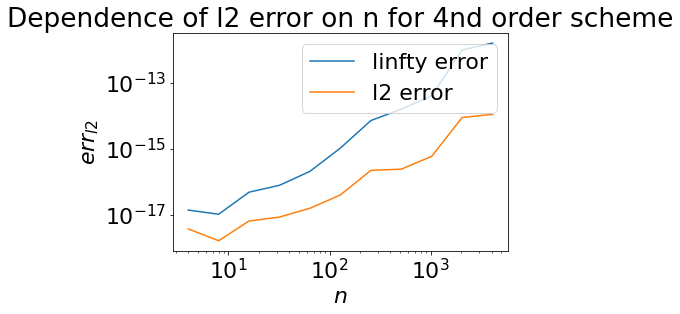

In [6]:
def fill_xyAf_4ndorder(n):
    h=L/(n)
    mas_x=[k*h for k in range(0,n+1)]
    mas_y_exact=[y_exact(x_k) for x_k in mas_x]
    mas_f=[(f(x_k-h)+10*f(x_k)+f(x_k+h))/12 for x_k in mas_x]
    mas_f[0]=0
    mas_f[n]=0
    A=np.zeros((n+1)*(n+1)).reshape(n+1,n+1)
    A[0][0]=1
    A[n][n]=1
    for k in range(1,n):
        A[k][k-1]=1/h**2
        A[k][k]=-2/h**2
        A[k][k+1]=1/h**2
    return mas_x, mas_y_exact, A, mas_f


from tqdm import tqdm

mas_n=np.array([2**i for i in range(2,13)])
mas_errl2=[]
mas_err_linfty=[]
for n in tqdm(mas_n):
    print("n=",n)
    mas_x, mas_y_exact, A, mas_f=fill_xyAf_4ndorder(n)
    mas_y=np.linalg.solve(A,mas_f)
    errorLinfty = LA.norm(mas_y-mas_y_exact, np.inf)
    mas_err_linfty.append(errorLinfty)
    errorL2 = LA.norm(mas_y-mas_y_exact)/len(mas_y)
    mas_errl2.append(errorL2)

mas_err_linfty=np.array(mas_err_linfty)
mas_errl2=np.array(mas_errl2)
plt.loglog(mas_n, mas_err_linfty,label='linfty error')
plt.loglog(mas_n, mas_errl2,label='l2 error')
plt.xlabel(r'$n$')
plt.ylabel(r'$err_{l2}$')
plt.legend()
plt.title('Dependence of l2 error on n for 4nd order scheme')
plt.legend(loc="upper right")
plt.show()

In [7]:
#for 4nd order method
(np.log(mas_err_linfty)[-1] - np.log(mas_err_linfty)[-3])/(np.log(mas_n)[-1]-np.log(mas_n)[-3])

2.6558318105905006

In [8]:
#for 4nd order method
(np.log(mas_errl2)[-1] - np.log(mas_errl2)[-3])/(np.log(mas_n)[-1]-np.log(mas_n)[-3])

2.1172677064119747

So we see that we definitely obtain much better error with 4nd order scheme than with 2nd order scheme - 
but then with increase of n, the error in 4nd order scheme also increases, while in the 2nd order scheme error decreases; But honestly it looks strange that the error increases with increase of $n$ — but I have never before used Numerov's scheme, so may be there are some nuances that one should be aware of.

## Task 2 - numerical integration of a wave packet [50 marks]

One of the topics we dedicated considerable attention to during previous weeks was the topic of numerical integration. In what follows we will consider a simplified model function for a **wave packet**, given in the form
 
$$f_k(x) = \exp(-x^2/2)\cos(kx),$$
 
where $n\in \mathbb{N}$ is a natural number. We have encountered the first term of this function before in the context of interpolation problems, while the trigonometric term allows useful variation in data that could be encountered in applications related to e.g. signal processing. As an aside, functions of this type are often used to explain concepts such as [group velocity](https://en.wikipedia.org/wiki/Group_velocity) (not a part of this assignment, but perhaps an interesting read).

Our goal will be to comprehensively study the sensitivity of numerical integration algorithms using the above function, with the following steps provided for guidance: 
 1. Conduct a visual inspection of the function behaviour for different values of $n$. What do you expect the result of the numerical integration to be as $n$ is varied? What will your selected integration limits be and why? Use plotting to your advantage and justify each answer using two-three sentences. 
 2. Implement the *trapezoidal rule* and *Simpson's rule* and test them on a simpler function of your choice to begin with. Convince yourselves (through ascertaining convergence properties and providing numerical evidence thereof, plotting, and discussion) of the accuracy of the implemented methods as you vary the number of points used to support the integration scheme. 
 3. You may also consider using [Boole's rule](https://en.wikipedia.org/wiki/Boole%27s_rule) for added accuracy, but this is not an assessed component of the assignment.
 4. Using your implementations, study the numerical integration result for different values of $n$ and draw suitable conclusions about the accuracy and capabilities of your algorithms. You should aim to cover (and provide insight on) the full problem space as much as possible.
 5. Comment on resource usage efficiency. How would you recommend a user practically tailor the setup of your implementation such that a good balance between accuracy and computational cost is reached? You may think of this as similar to writing a small user guide accompanying your code.

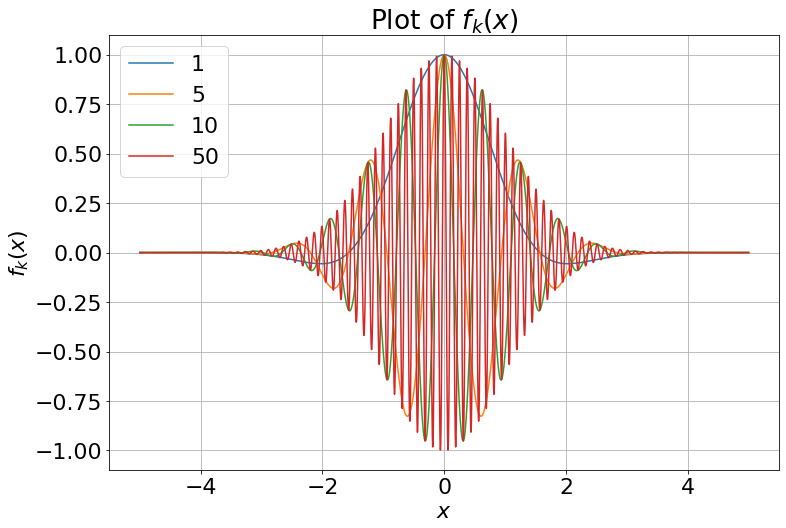

In [9]:
def f(x,k):
    return np.exp(-x**2/2)*np.cos(k*x)

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 8))

mas_x=np.linspace(-5,5,10000)
for k in [1,5,10,50]:
    mas_y=[f(x,k) for x in mas_x]
    plt.plot(mas_x, mas_y, label=k)


plt.legend(loc="upper left")

plt.xlabel(r"$x$")
plt.ylabel(r"$f_k(x)$")

plt.grid()
plt.title(r'Plot of $f_k(x)$')
plt.show()



### 1) Let's look at the graph and analyse the behaviour of the function.

a) We see that the bigger the $k$, the more oscillations has the function, 
so for big $k$ the function is rapindly changing, 
so we expect to be forced to use smaller steps $h$ for our integration to obtain the answer close to the true integral.

b)And also for big n because of many sscillations, the function becomes symmetric with respect to the the horizontal axis, so we expect the integral to tend to zero as $k$ increases to infinity and step $h$ keeps sufficiently small (because if, for example, we choose points on the grid so unluckily that $f(x_i)$ always is positive - we will not obtain anything close to the true integral).

c) Because of the exponent $e^{-0.5x^2}$ very fast growth and the fact that $|cos(kx)| \leq 1$, we see that $|f_k(x)| \leq e^{-0.5x^2}$, so at $x=4$ the modulus of $f_n$ for any $k$ will not increase $e^{-8}\approx 0.00033546262790251185.$ 

d) We can choose the limits of integration $[-L,L]$ cleverly and mathematically reasonably: using the inequality for the modulus and the integral, we obtain that after throwing away the piece of integral righter than $x=L$, we will induce the following error:

$|\int_L^{+\infty} e^{-0.5x^2} cos(nx)dx | \leq \int_L^{+\infty} |e^{-0.5x^2} cos(nx)|dx = \int_L^{+\infty} e^{-0.5x^2} dx = 1-\Phi(L)$, where $\Phi(x)$ is the cumulative distribution function for standart normal random variable. And for this cdf we have tables. So if, for example, we want to compute the $I_n=\int_{-\infty}^{\infty} f_n(x)dx$ with error err, then each of of the left and right tail integrals should be less than $err/2$, so -L is the quantile of the standard normal distribution of level  $err/2$. For example, if we want to compute $I_n$ with error no more than $10^{-6}$, we should take $-L$ to be equal to quantile of level $10^{-6}/2$, which is approximately -4.8916; so in my opinion, limits $[-L,L]=[-5,5]$ are sufficient.

In [10]:
from scipy.stats import norm

#example: choose limits of integration for err
err=10**(-6)
L=norm.ppf(err/2)
print([-L,L])

[4.891638475698591, -4.891638475698591]


In [11]:

def integrate_interval_trapezoidal(a,b,n,f,*args,**kwargs):
    mas_x,h=np.linspace(a,b,n, retstep=True)
    otv=0
    for i in range(1,n):
        a=mas_x[i-1]
        b=mas_x[i]
        otv+=(f(a,*args,**kwargs)+f(b,*args,**kwargs))/2*h
    return otv

def integrate_interval_simpson(a,b,n,f,*args,**kwargs):
    mas_x,h=np.linspace(a,b,n, retstep=True)
    otv=0
    for i in range(1,n):
        a=mas_x[i-1]
        b=mas_x[i]
        otv+=(f(a,*args,**kwargs)+4*f(0.5*(a+b),*args,**kwargs)+f(b,*args,**kwargs))/6*h
    return otv

integrate_interval_trapezoidal(a=-5,b=5,n=10000,f=f,k=100000)

-2.3481961890736413e-09

We see that for big $k$ the integral tends to zero, as we expected.

But before using these both integration algorithms, let's check that they integrate correctly those functions, whose integral we can compute analytically;
For example, we know the Poisson integral: $\int_{-\infty}^{\infty} e^{-\frac{x^2}{2}} dx =\sqrt{2\pi}$

In [12]:
def f_poisson(x):
    return np.exp(-x**2/2)

I_trapezoidal=integrate_interval_trapezoidal(a=-5,b=5,n=10000,f=f_poisson)
I_simpson=integrate_interval_simpson(a=-5,b=5,n=100,f=f_poisson)
I_true=np.sqrt(2*np.pi)
print("True I=", I_true)
print("I_trapezoidal=",I_trapezoidal, np.abs(I_trapezoidal-I_true))
print("I_simpson=",I_simpson,np.abs(I_simpson-I_true))

True I= 2.5066282746310002
I_trapezoidal= 2.5066268375700176 1.4370609826563907e-06
I_simpson= 2.5066268375436542 1.4370873460123335e-06


### 2) Implementation of trapezoidal and simpson

So we see that both trapezoidal and simpson integrators are integrating good functions correctly! Now we will analyse the speed of convergence of both schemes  - so what power of $h$ does the error term have? We expect that trapezoidal scheme has $\underline O(h^3)$ error and simpson has $\underline O(h^5)$ error.

Indeed, using the Taylor expansion theorem, we obtain $\int_{a}^{b} f(x)dx=\frac{f(a)+f(b)}{2}(b-a) + \underline O((b-a)^3) $

Actually, using identity $\int_{a}^{b} f(x)dx=\frac{f(a)+f(b)}{2}(b-a) +\frac{1}{2} \int_{a}^{b} f^{''}(x)(x-a)(x-b)dx$, we can obtain even the exact constant of error term in $\underline O((b-a)^3)$:

$|\int_{a}^{b} f(x)dx-\frac{f(a)+f(b)}{2}(b-a)| \leq \frac{||f^{''}||}{12} (b-a)^3$

About simpson using Taylor's expansion theorem, we expect to have:

$\int_{a}^{b} f(x)dx=\frac{f(a)+4f(\frac{a+b}{2})+f(b)}{6}(b-a) + \underline O((b-a)^5)$

Actually, we can obtain even the exact constant of error term in $\underline O((b-a)^5)$:

$|\int_{a}^{b} f(x)dx-\frac{f(a)+4f(\frac{a+b}{2})+f(b)}{6}(b-a)| \leq \frac{||f^{(4)}||}{1536} (b-a)^5$

Now let's try increasing $n$ and see how the error reduces

In [13]:
# first choose limits of integration for err=10^{-30}
err=10**(-30)
L=norm.ppf(err/2)
print([-L,L]) #=> we will take L=20, to be on the safe side

[11.523883577380248, -11.523883577380248]


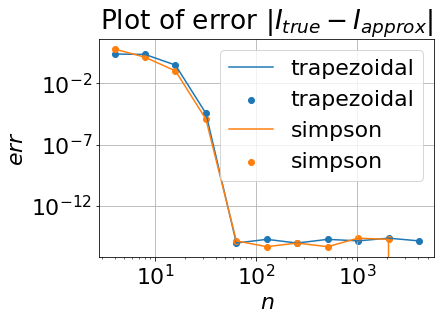

In [14]:
mas_n=[2**i for i in range(2,13)]
mas_err_trapezoidal=[]
mas_err_simpson=[]
I_true=np.sqrt(2*np.pi)
for n in mas_n:
    tek_I_trapezoidal=integrate_interval_trapezoidal(a=-20,b=20,n=n,f=f_poisson)
    tek_I_simpson=integrate_interval_simpson(a=-20,b=20,n=n,f=f_poisson)
    tek_err_trapezoidal=np.abs(tek_I_trapezoidal-I_true)
    tek_err_simpson=np.abs(tek_I_simpson-I_true)
    mas_err_trapezoidal.append(tek_err_trapezoidal)
    mas_err_simpson.append(tek_err_simpson)
    #print(tek_I_trapezoidal, tek_I_simpson,tek_err_trapezoidal,tek_err_simpson)

mas_err_trapezoidal=np.array(mas_err_trapezoidal)
mas_err_simpson=np.array(mas_err_simpson)

plt.loglog(mas_n, mas_err_trapezoidal, label='trapezoidal')
plt.scatter(mas_n, mas_err_trapezoidal, label='trapezoidal')
plt.loglog(mas_n, mas_err_simpson, label='simpson')
plt.scatter(mas_n, mas_err_simpson, label='simpson')
plt.legend(loc="upper right")

# plt.plot(np.log(mas_n), np.log(mas_err_trapezoidal), label='trapezoidal')
# plt.plot(np.log(mas_n), np.log(mas_err_simpson), label='simpson')
# plt.legend(loc="upper right")

plt.xlabel(r"$n$")
plt.ylabel(r"$err$")

plt.grid()
plt.title(r'Plot of error $|I_{true}-I_{approx}|$')
plt.show()

We see that the error decreases as $n$ decreases - 
but with integration poisson integral the integrating limits also matter,

so let's check an easier function on a finite interval, namely,  
$\int_{0}^{10} e^x dx= e^{10}-1$

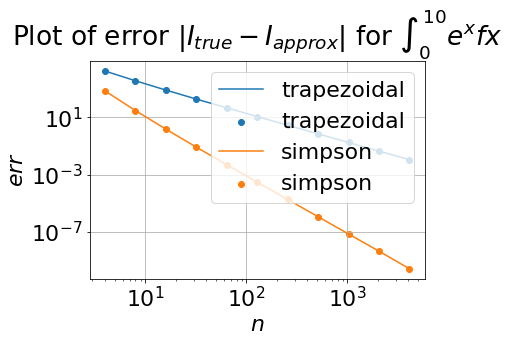

In [15]:
def f_exp(x):
    return np.exp(x)

mas_n=[2**i for i in range(2,13)]
mas_err_trapezoidal=[]
mas_err_simpson=[]
I_true=np.exp(10)-1

for n in mas_n:
    tek_I_trapezoidal=integrate_interval_trapezoidal(a=0,b=10,n=n,f=f_exp)
    tek_I_simpson=integrate_interval_simpson(a=0,b=10,n=n,f=f_exp)
    tek_err_trapezoidal=np.abs(tek_I_trapezoidal-I_true)
    tek_err_simpson=np.abs(tek_I_simpson-I_true)
    mas_err_trapezoidal.append(tek_err_trapezoidal)
    mas_err_simpson.append(tek_err_simpson)
    #print(tek_I_trapezoidal, tek_I_simpson,tek_err_trapezoidal,tek_err_simpson)

mas_err_trapezoidal=np.array(mas_err_trapezoidal)
mas_err_simpson=np.array(mas_err_simpson)

plt.loglog(mas_n, mas_err_trapezoidal, label='trapezoidal')
plt.scatter(mas_n, mas_err_trapezoidal, label='trapezoidal')
plt.loglog(mas_n, mas_err_simpson, label='simpson')
plt.scatter(mas_n, mas_err_simpson, label='simpson')
plt.legend(loc="upper right")


plt.xlabel(r"$n$")
plt.ylabel(r"$err$")

plt.grid()
plt.title(r'Plot of error $|I_{true}-I_{approx}|$ for $\int_{0}^{10} e^x fx$')
plt.show()

In [16]:
#for trapezoidal method
(np.log(mas_err_trapezoidal)[-1] - np.log(mas_err_trapezoidal)[-3])/(np.log(mas_n)[-1]-np.log(mas_n)[-3])

-2.0010562283584323

In [17]:
#for simpson method
(np.log(mas_err_simpson)[-1] - np.log(mas_err_simpson)[-3])/(np.log(mas_n)[-1]-np.log(mas_n)[-3])

-4.039272746259332

So we see that the powers are 2 and 4, as we expected.

### 4) Now let's plot the dependence of integral $I_k$ from $k$ with uncahnged amount of points on the grid $n=10000$ (we expect it to tend to zero due to symmetry)

In [18]:
# first choose limits of integration for err=10^{-30}
err=10**(-30)
L=norm.ppf(err/2)
print([-L,L]) #=> we will take L=20, to be on the safe side

[11.523883577380248, -11.523883577380248]


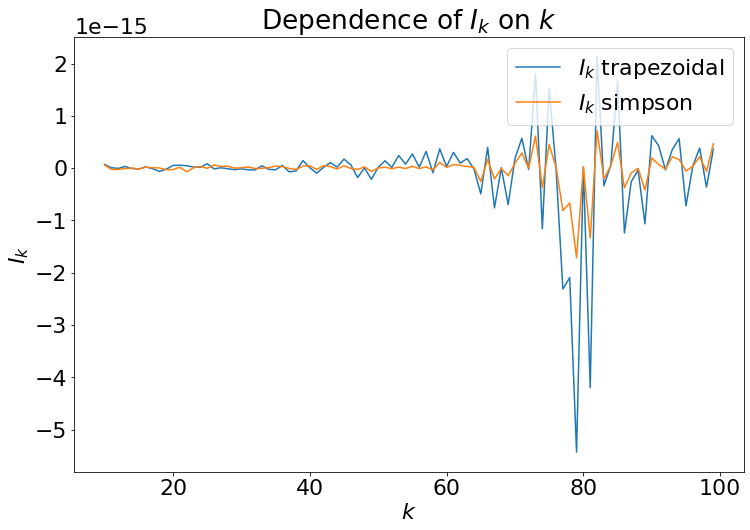

In [19]:
# here we explore sufficiently big k: from 10 to 200 - and there are many oscillations
mas_k=[i for i in np.arange(10,100,1)]
mas_Ik_trapezoidal=[]
mas_Ik_simpson=[]
for k in mas_k:
    tek_Ik_trapezoidal=integrate_interval_trapezoidal(a=-20,b=20,n=1000,f=f,k=k)
    mas_Ik_trapezoidal.append(tek_Ik_trapezoidal)
    tek_Ik_simpson=integrate_interval_simpson(a=-20,b=20,n=1000,f=f,k=k)
    mas_Ik_simpson.append(tek_Ik_simpson)
    
mas_Ik_trapezoidal=np.array(mas_Ik_trapezoidal)
mas_Ik_simpson=np.array(mas_Ik_simpson)

plt.figure(figsize=(12, 8))
plt.plot(mas_k, mas_Ik_trapezoidal, label=r'$I_k$ trapezoidal')
plt.plot(mas_k, mas_Ik_simpson, label=r'$I_k$ simpson')
plt.xlabel(r'$k$')
plt.ylabel(r'$I_k$')
plt.legend()
plt.title('Dependence of $I_k$ on $k$')
plt.legend(loc="upper right")
plt.show()

So we see that the integral $I_k$ really tends to zero 
as $k\to\infty$ asd we also see that simpson scheme gives less volatile results, than the trapezoidal rule;
And we also see that as $k=80$ some problems occur with both schemes. 
So maybe we need to explore the case $k=80$ separately

And also strangely enough, if we set very large amout of grid points, we will $n=5000$ see that both trapezoidal and simpson have problems.

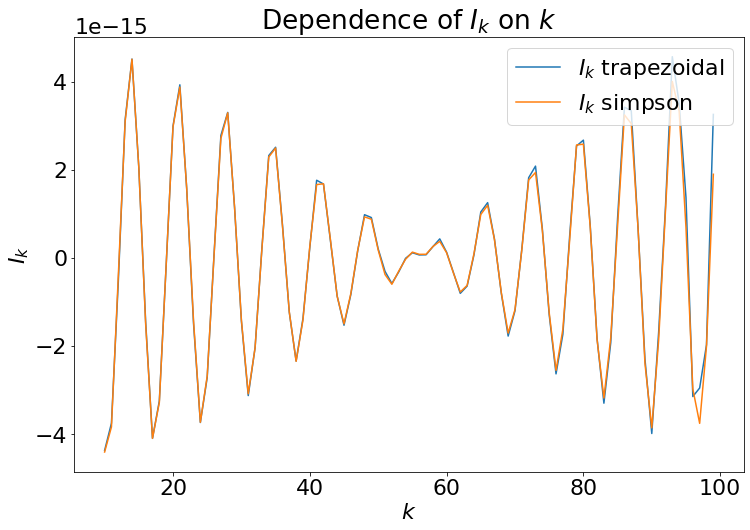

In [20]:
# here we explore sufficiently big k: from 10 to 200 - and there are many oscillations
mas_k=[i for i in np.arange(10,100,1)]
mas_Ik_trapezoidal=[]
mas_Ik_simpson=[]
for k in mas_k:
    tek_Ik_trapezoidal=integrate_interval_trapezoidal(a=-20,b=20,n=5000,f=f,k=k)
    mas_Ik_trapezoidal.append(tek_Ik_trapezoidal)
    tek_Ik_simpson=integrate_interval_simpson(a=-20,b=20,n=5000,f=f,k=k)
    mas_Ik_simpson.append(tek_Ik_simpson)
    
mas_Ik_trapezoidal=np.array(mas_Ik_trapezoidal)
mas_Ik_simpson=np.array(mas_Ik_simpson)

plt.figure(figsize=(12, 8))
plt.plot(mas_k, mas_Ik_trapezoidal, label=r'$I_k$ trapezoidal')
plt.plot(mas_k, mas_Ik_simpson, label=r'$I_k$ simpson')
plt.xlabel(r'$k$')
plt.ylabel(r'$I_k$')
plt.legend()
plt.title('Dependence of $I_k$ on $k$')
plt.legend(loc="upper right")
plt.show()

And now let's explore small $k$, from 1 to 10

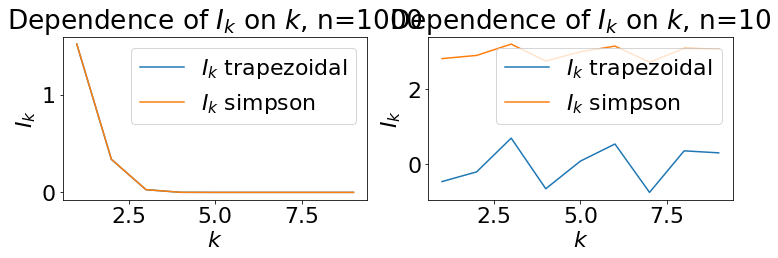

In [21]:
# here we explore sufficiently small k: from 1 to 10 - and there are not many oscillations
mas_k=[i for i in np.arange(1,10,1)]

fig, axes = plt.subplots(1, 2)
fig.set_figheight(3)
fig.set_figwidth(12)

mas_Ik_trapezoidal=[]
mas_Ik_simpson=[]
for k in mas_k:
    tek_Ik_trapezoidal=integrate_interval_trapezoidal(a=-20,b=20,n=1000,f=f,k=k)
    mas_Ik_trapezoidal.append(tek_Ik_trapezoidal)
    tek_Ik_simpson=integrate_interval_simpson(a=-20,b=20,n=1000,f=f,k=k)
    mas_Ik_simpson.append(tek_Ik_simpson)
    
mas_Ik_trapezoidal=np.array(mas_Ik_trapezoidal)
mas_Ik_simpson=np.array(mas_Ik_simpson)


axes[0].plot(mas_k, mas_Ik_trapezoidal, label=r'$I_k$ trapezoidal')
axes[0].plot(mas_k, mas_Ik_simpson, label=r'$I_k$ simpson')
axes[0].set_xlabel(r'$k$')
axes[0].set_ylabel(r'$I_k$')
axes[0].set_title('Dependence of $I_k$ on $k$, n={}'.format(1000))
axes[0].legend(loc="upper right")


mas_Ik_trapezoidal=[]
mas_Ik_simpson=[]
for k in mas_k:
    tek_Ik_trapezoidal=integrate_interval_trapezoidal(a=-20,b=20,n=10,f=f,k=k)
    mas_Ik_trapezoidal.append(tek_Ik_trapezoidal)
    tek_Ik_simpson=integrate_interval_simpson(a=-20,b=20,n=10,f=f,k=k)
    mas_Ik_simpson.append(tek_Ik_simpson)
    
mas_Ik_trapezoidal=np.array(mas_Ik_trapezoidal)
mas_Ik_simpson=np.array(mas_Ik_simpson)


axes[1].plot(mas_k, mas_Ik_trapezoidal, label=r'$I_k$ trapezoidal')
axes[1].plot(mas_k, mas_Ik_simpson, label=r'$I_k$ simpson')
axes[1].set_xlabel(r'$k$')
axes[1].set_ylabel(r'$I_k$')
axes[1].set_title('Dependence of $I_k$ on $k$, n={}'.format(10))
axes[1].legend(loc="upper right")

plt.show()

For small $k$ (with not many oscillations) we see that both trapezoidal 
and simpson schemes give the same result, that nicely tends to zero.
But interestingly enough this nice behavoiur of both schemes takes place only for big number of points on the grid! 
While for small emount of points $n=10$ trapezoidal gives better results (blue are closer to zero!) than the simpson (even despite the fact that simpson is of highher order!)

Now we explore how does the answer depend on integration limit $L$ and amount of points on the grid $n$.

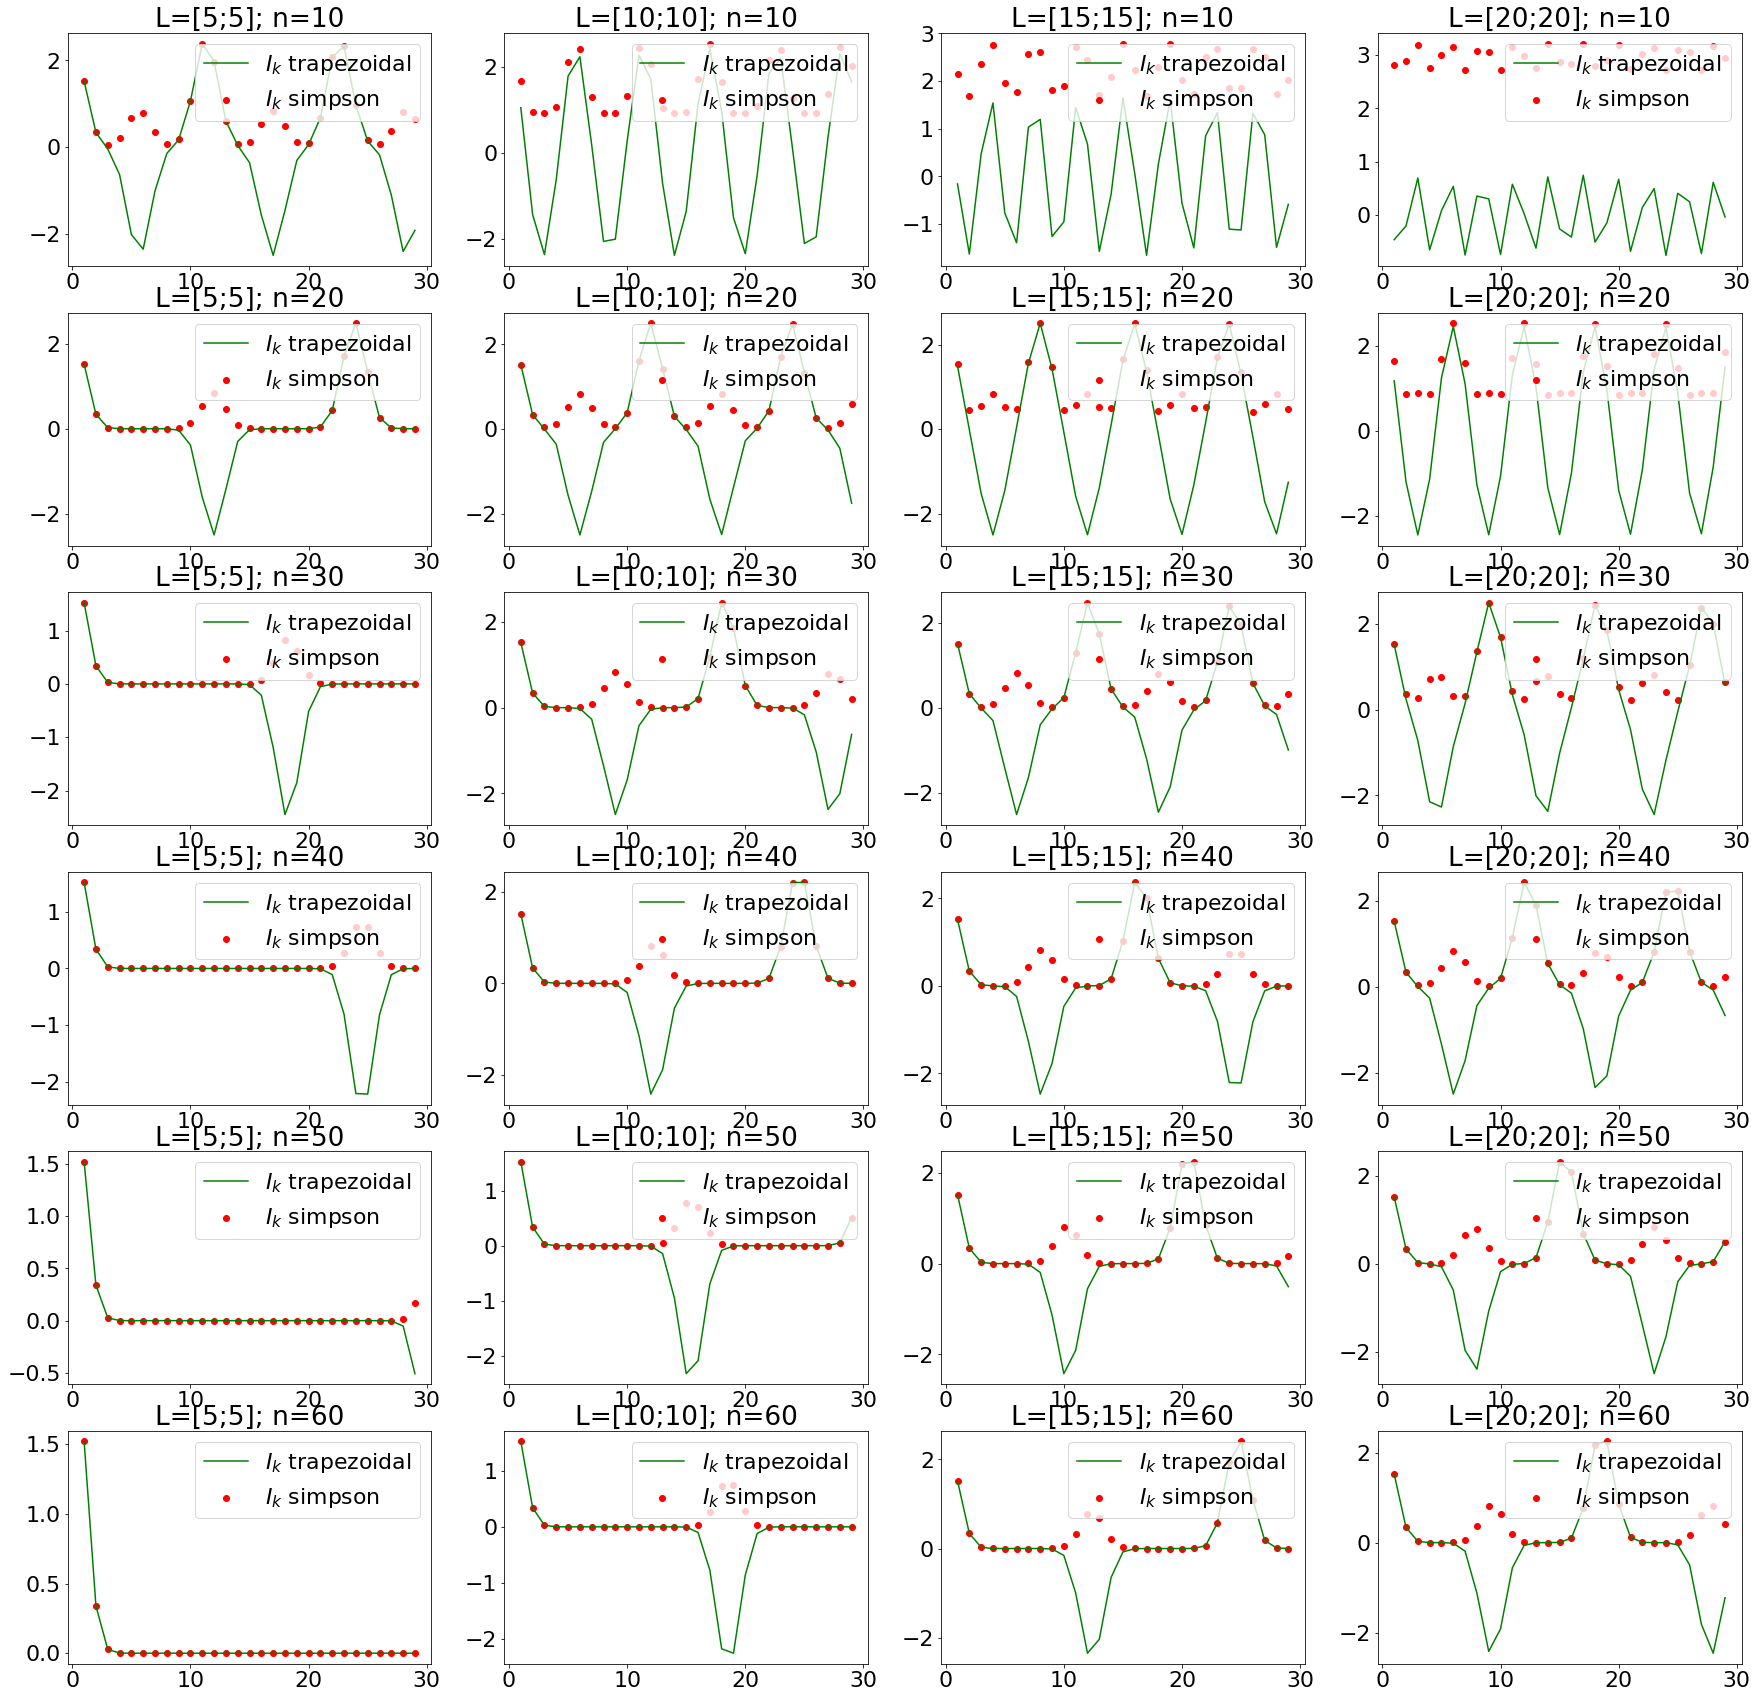

In [22]:


def get_Ik_both(L,n):
    mas_k=[i for i in np.arange(1,30,1)]
    mas_Ik_trapezoidal=[]
    mas_Ik_simpson=[]
    for k in mas_k:
        tek_Ik_trapezoidal=integrate_interval_trapezoidal(a=-L,b=L,n=n,f=f,k=k)
        mas_Ik_trapezoidal.append(tek_Ik_trapezoidal)
        tek_Ik_simpson=integrate_interval_simpson(a=-L,b=L,n=n,f=f,k=k)
        mas_Ik_simpson.append(tek_Ik_simpson)

    mas_Ik_trapezoidal=np.array(mas_Ik_trapezoidal)
    mas_Ik_simpson=np.array(mas_Ik_simpson)
    return mas_k,mas_Ik_trapezoidal, mas_Ik_simpson



fig, axes = plt.subplots(6, 4)
fig.set_figheight(30)
fig.set_figwidth(30)

for i in range(1,7):
    for j,l in enumerate([5,10,15,20]):
        n=10*i
        mas_k,mas_Ik_trapezoidal, mas_Ik_simpson=get_Ik_both(L=l,n=n)
        #print(mas_Ik_trapezoidal, mas_Ik_simpson)
        axes[i-1,j].plot(mas_k, mas_Ik_trapezoidal, label=r'$I_k$ trapezoidal',c='g')
        axes[i-1,j].scatter(mas_k, mas_Ik_simpson, label=r'$I_k$ simpson',c='r')
        #axes[i-1,j].set_xlabel(r'$k$')
        #axes[i-1,j].set_ylabel(r'$I_k$')
        axes[i-1,j].set_title(str("L="+"[{};{}]"+"; "+"n="+str(n)).format(l,l))
        axes[i-1,j].legend(loc="upper right")

        


So we see that:
1) generally trapezoidal is less stable and gives more oscillations, so we prefer simpson;
2) Large $n$ is better than small - it is as we expect, because the smaller the step, the less will be integrating error
3) What limit L to choose? from plot of the function we saw that the function fades almost to zero off the interval $[-5;5]$, so I will say $L=5$ is good for everyday life,
but obviously if we need high accuracy like $10^{-20}$ - we should not discregard the error introduced by throwing away the tails (intervals to the left of $-L$ and to the right of $L$ );
In this case we first need to choose $L=norm.ppf(err/2)$, as I explained above. 

### 5) From the above analysis we can formulate a user guide to choose $L$ and $n$ for his specific $k$ and desired accuracy err.

a)First take your err and find the integration boundary $L$ by the formula: 
$L=norm.ppf(err/2)$ - this will give you the finite interval to integrate with introducing error not bugger than err;

b) Then look at your $k$ - if $k$ is big, then there are many oscillations, and you sholud be very careful 
and take small integration step(that is, take big $n$) - otherwise you will not have enough grid points in 
each one forth of period of our oscillating function;

c) We understand that the period of $\cos(kx)$ is $\frac{2\pi}{k}$, 
and it will be stupid to have less than 2 points in each one forth of period of our oscillating function - so $h=\frac{2\pi}{8k}$ is recommended.

So $n=\frac{2L}{h}=\frac{8Lk}{\pi}$ is recommended.
    
For example, for $L=5$,$k=7$, this formula will give recommended number of points $n=89.1267$, and we have seen on the graph above that $n$ from 50 to 100 are the ones that tend to give not oscillating results.

It is important to emphasise, that if you take less $n$ than the formula recommends — you will have error greater than your desired error, and if you take $n$ greater than recommended — then it will be not completely bad, but you will simply make more operations to obtain result.

Lets check that our formula works: we calculate $I_k$ for different $k$ with adaptve amout of $n$. 
But lets take not 8 points on each quarter of period, but 16 - just to be on the safe side.

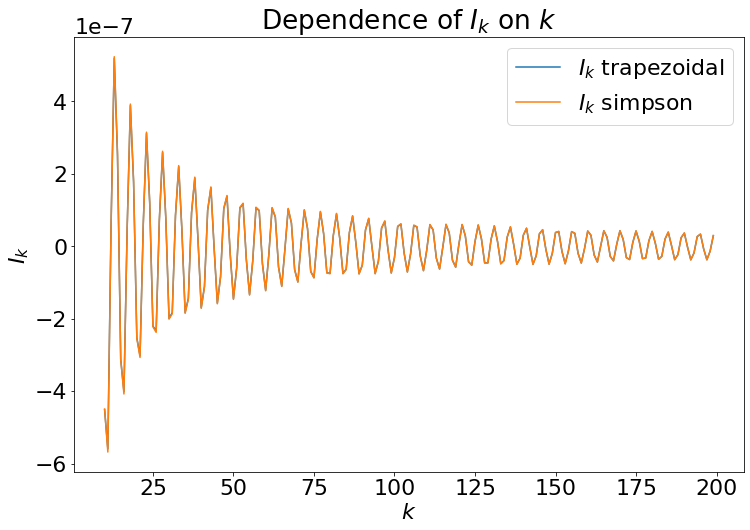

In [23]:
# here we explore sufficiently big k: from 10 to 200 - and there are many oscillations
mas_k=[i for i in np.arange(10,200,1)]
mas_Ik_trapezoidal=[]
mas_Ik_simpson=[]
L=5
for k in mas_k:
    n=2*int(8*k*L/np.pi)
    tek_Ik_trapezoidal=integrate_interval_trapezoidal(a=-L,b=L,n=n,f=f,k=k)
    mas_Ik_trapezoidal.append(tek_Ik_trapezoidal)
    tek_Ik_simpson=integrate_interval_simpson(a=-L,b=L,n=n,f=f,k=k)
    mas_Ik_simpson.append(tek_Ik_simpson)
    
mas_Ik_trapezoidal=np.array(mas_Ik_trapezoidal)
mas_Ik_simpson=np.array(mas_Ik_simpson)

plt.figure(figsize=(12, 8))
plt.plot(mas_k, mas_Ik_trapezoidal, label=r'$I_k$ trapezoidal')
plt.plot(mas_k, mas_Ik_simpson, label=r'$I_k$ simpson')
plt.xlabel(r'$k$')
plt.ylabel(r'$I_k$')
plt.legend()
plt.title('Dependence of $I_k$ on $k$')
plt.legend(loc="upper right")
plt.show()

And from the graph we see that the formula works! Bad piks at $k=80$ and $k=150$ disappeared!